In [ ]:
#importing inbuilt libraries
import re
import string

#importing 3rd party libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import pandas as pd
import numpy as np

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

from statistics import mean

%matplotlib inline

In [ ]:
#mounting drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset
train_df = pd.read_csv("/content/drive/MyDrive/train.csv.zip")
test_df = pd.read_csv("/content/drive/MyDrive/test.csv.zip")
test_y = pd.read_csv("/content/drive/MyDrive/test_labels.csv.zip")


In [ ]:
#verify training set
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
#analysis of training Dataset
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#checking training data for null values
train_df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
#verify test set
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
#verify test labels
test_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
#verify dimensions of loaded train and test set
print(train_df.shape)
print(test_df.shape)

(159571, 8)
(153164, 2)


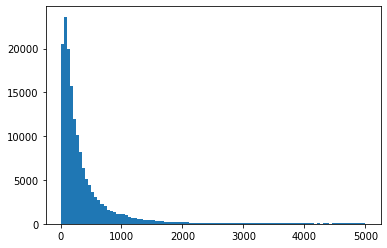

In [ ]:
#plot a graph to find the average length of comments
lens = train_df.comment_text.str.len()
plt.hist(lens, bins = 100)
plt.show()

In [ ]:
#labeling of data
labels = train_df[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

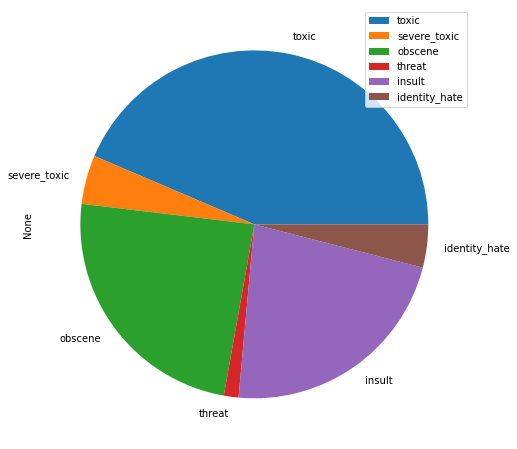

In [ ]:
#plot a piechart to find the distribution of categories of toxic comments
labels.sum().plot.pie(y= 'Comment count' , figsize =(8,8),legend = True)

In [ ]:
#find the correleation between the categories
correlation = labels.corr()
correlation.style.background_gradient(cmap = 'jet').set_precision(2)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.00,0.31,0.68,0.16,0.65,0.27
severe_toxic,0.31,1.00,0.40,0.12,0.38,0.20
obscene,0.68,0.40,1.00,0.14,0.74,0.29
threat,0.16,0.12,0.14,1.00,0.15,0.12
insult,0.65,0.38,0.74,0.15,1.00,0.34
identity_hate,0.27,0.20,0.29,0.12,0.34,1.00


In [ ]:
#vectorizing the comments
vec = TfidfVectorizer(stop_words = 'english')

In [ ]:
train_x = vec.fit_transform(train_df['comment_text'])
test_x= vec.transform(test_df['comment_text'])

In [ ]:
pred = np.zeros((test_df.shape[0],len(label_cols)))

In [ ]:
#define a Multinomial Naive Bayes model
loss = []
for i,col in enumerate(label_cols):
    lr = MultinomialNB()
    print('Building model {} for column: {''}'.format(i+1,col))
    #training the model 
    lr.fit(train_x,train_df[col])
    pred[:,i] = lr.predict_proba(test_x)[:,1]
    prediction =  lr.predict(train_x)
    print('Column: {''}'.format(col))
    print('\nConfusion matrix\n',confusion_matrix(labels[col],prediction))
    print(classification_report(labels[col],prediction))
    print('ROC AUC:', roc_auc_score(train_df[col],prediction))
    loss.append(roc_auc_score(train_df[col],prediction))
    print('\n\n')
    

Building model 1 for column: toxic
Column: toxic

Confusion matrix
 [[144237     40]
 [ 11649   3645]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    144277
           1       0.99      0.24      0.38     15294

    accuracy                           0.93    159571
   macro avg       0.96      0.62      0.67    159571
weighted avg       0.93      0.93      0.91    159571

ROC AUC: 0.6190257559539045



Building model 2 for column: severe_toxic
Column: severe_toxic

Confusion matrix
 [[157966     10]
 [  1595      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    157976
           1       0.00      0.00      0.00      1595

    accuracy                           0.99    159571
   macro avg       0.50      0.50      0.50    159571
weighted avg       0.98      0.99      0.99    159571

ROC AUC: 0.4999683496227275



Building model 3 for column: obscene
Column: obscene

Confusion 

In [ ]:
#verifying the average ROC AUC score
print(np.mean(loss))

0.5400381612952728


In [ ]:
prediction = np.zeros((test_df.shape[0],len(label_cols)))

In [ ]:
#creating a logistic regression model
l1 = []
for i,col in enumerate(label_cols):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced',max_iter =100000)
    print('Building model {} for column: {''}'.format(i+1,col)) 
    #training the model
    lr.fit(train_x,train_df[col])
    pred[:,i] = lr.predict_proba(test_x)[:,1]
    prediction =  lr.predict(train_x)
    print('Column: {''}'.format(col))
    print('\nConfusion matrix\n',confusion_matrix(labels[col],prediction))
    print(classification_report(labels[col],prediction))
    print('ROC AUC:', roc_auc_score(train_df[col], prediction))
    l1.append(roc_auc_score(train_df[col], prediction))
    print('\n\n')

Building model 1 for column: toxic
Column: toxic

Confusion matrix
 [[139355   4922]
 [   236  15058]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    144277
           1       0.75      0.98      0.85     15294

    accuracy                           0.97    159571
   macro avg       0.88      0.98      0.92    159571
weighted avg       0.97      0.97      0.97    159571

ROC AUC: 0.9752270901880993



Building model 2 for column: severe_toxic
Column: severe_toxic

Confusion matrix
 [[155288   2688]
 [     1   1594]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    157976
           1       0.37      1.00      0.54      1595

    accuracy                           0.98    159571
   macro avg       0.69      0.99      0.77    159571
weighted avg       0.99      0.98      0.99    159571

ROC AUC: 0.9911788989653284



Building model 3 for column: obscene
Column: obscene

Confusion 

In [ ]:
#verifying ROC AUC score
print(np.mean(l1))

0.9888340867336378


In [ ]:
#since results are better for logistic regresiion that multinomial naive bayes model, we will move forward
#with logistic regression
lr_toxic =  LogisticRegression(C=2,class_weight = 'balanced',max_iter =100000)
print('Building model 1 for Toxic')
lr_toxic.fit(train_x,train_df['toxic'])

Building model 1 for Toxic


LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_st =  LogisticRegression(C=2,class_weight = 'balanced',max_iter =100000)
print('Building model 2 for severe_toxic')
lr_st.fit(train_x,train_df['severe_toxic'])

Building model 2 for severe_toxic


LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_obs =  LogisticRegression(C=2,class_weight = 'balanced',max_iter =100000)
print('Building model 3 for obscene')
lr_obs.fit(train_x,train_df['obscene'])

Building model 3 for obscene


LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_threat =  LogisticRegression(C=2,class_weight = 'balanced',max_iter =100000)
print('Building model 4 for threat')
lr_threat.fit(train_x,train_df['threat'])

Building model 4 for threat


LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_insult =  LogisticRegression(C=2,class_weight = 'balanced',max_iter =100000)
print('Building model 5 for insult')
lr_insult.fit(train_x,train_df['insult'])

Building model 5 for insult


LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_ih =  LogisticRegression(C=2,class_weight = 'balanced',max_iter =100000)
print('Building model 6 for identity_hate')
lr_ih.fit(train_x,train_df['identity_hate'])

Building model 6 for identity_hate


LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#change the below code to get predictions for toxic comments
txt = 'I will kill you!'
apl = vec.transform([txt])

In [ ]:
tox_o = lr_toxic.predict_proba(apl)
s_tox_o = lr_st.predict_proba(apl)
obs_o = lr_obs.predict_proba(apl)
threat_o = lr_threat.predict_proba(apl)
insult_o = lr_insult.predict_proba(apl)
identity_o = lr_ih.predict_proba(apl)

In [ ]:
print(tox_o[:,1],' ',s_tox_o[:,1],' ',obs_o[:,1],' ',threat_o[:,1],' ',insult_o[:,1],' ',identity_o[:,1])

[0.99710521]   [0.92497096]   [0.70602681]   [0.99999963]   [0.71788362]   [0.34156501]
